# CPCS433_Project
Model= Logistic Regression =Wasan(2115109), Duaa(2005357)


Model= KNN =Bushra(1914897), Wafa(1915259)


Model=XGBoost =Shatha(2009053),Samar(2105041)

Model= Naive Bayes = Raghad (2105691), Rafa(2106048)

https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

**Note: Results in this code file may differ slightly from those in the paper due to updates from a final run attempt performed after the paper was written.

##1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from sklearn.decomposition import PCA


## 2. Dataset Overview

### 2.1 Load The DataSet

In [ ]:
# Upload The Dataset
from google.colab import files
files.upload()

Saving Breast-Cancer.csv to Breast-Cancer.csv


{'Breast-Cancer.csv': b'id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst\n842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189\n842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902\n84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999

In [ ]:
df = pd.read_csv('Breast-Cancer.csv')

### 2.2 Dataset Structure (EDA)

In [ ]:
# Print the shape of the data
print("Dataset Shape:", df.shape)

Dataset Shape: (569, 32)


In [ ]:
# Display the first few rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Print dataset info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se

In [ ]:
# Describe the dataset
df.describe().T.style.background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))


,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [ ]:
# Print the dataset's columns
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
# Print the data types of the columns
print("Column Data Types:", df.dtypes)

Column Data Types: id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
c

In [ ]:
# Drop the 'id' column
df = df.drop(columns=['id'])

# Confirm the column is dropped
print(df.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [ ]:
# Plot a histogram of the 'diagnosis' column
px.histogram(
    data_frame=df,
    x='diagnosis',
    color='diagnosis',
    color_discrete_sequence=['#A865C9', '#f6abb6']
)

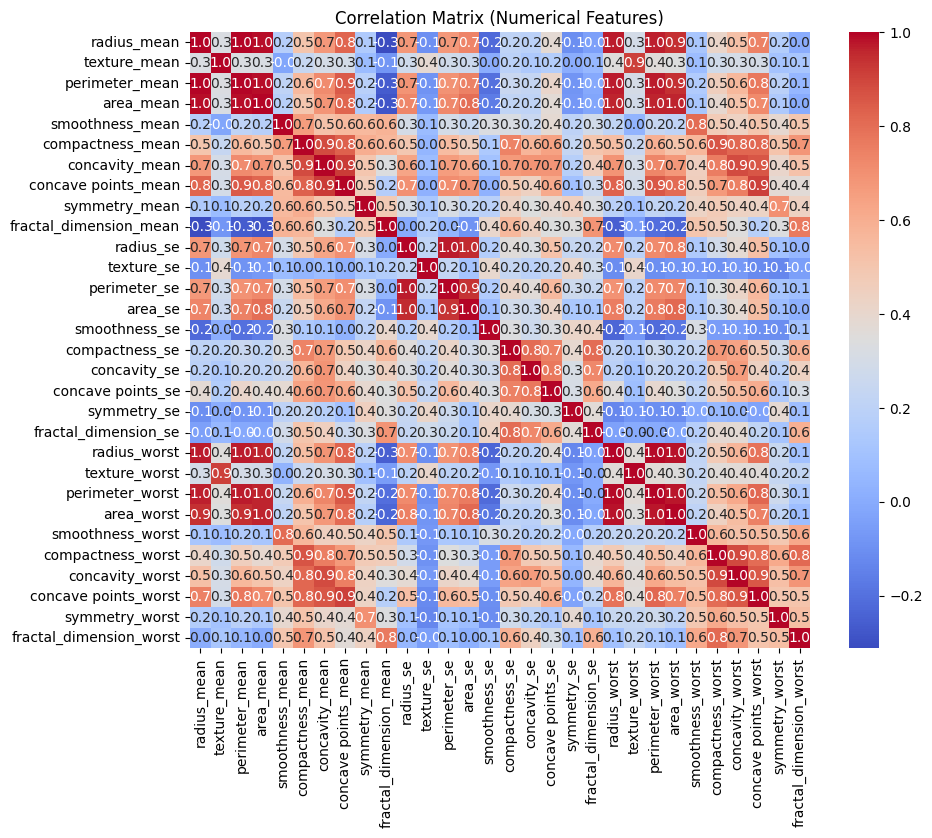

In [ ]:
# Correlation Matrix
# Exclude the diagnosis column for correlation matrix
numerical_features = df.drop(columns=['diagnosis']).select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


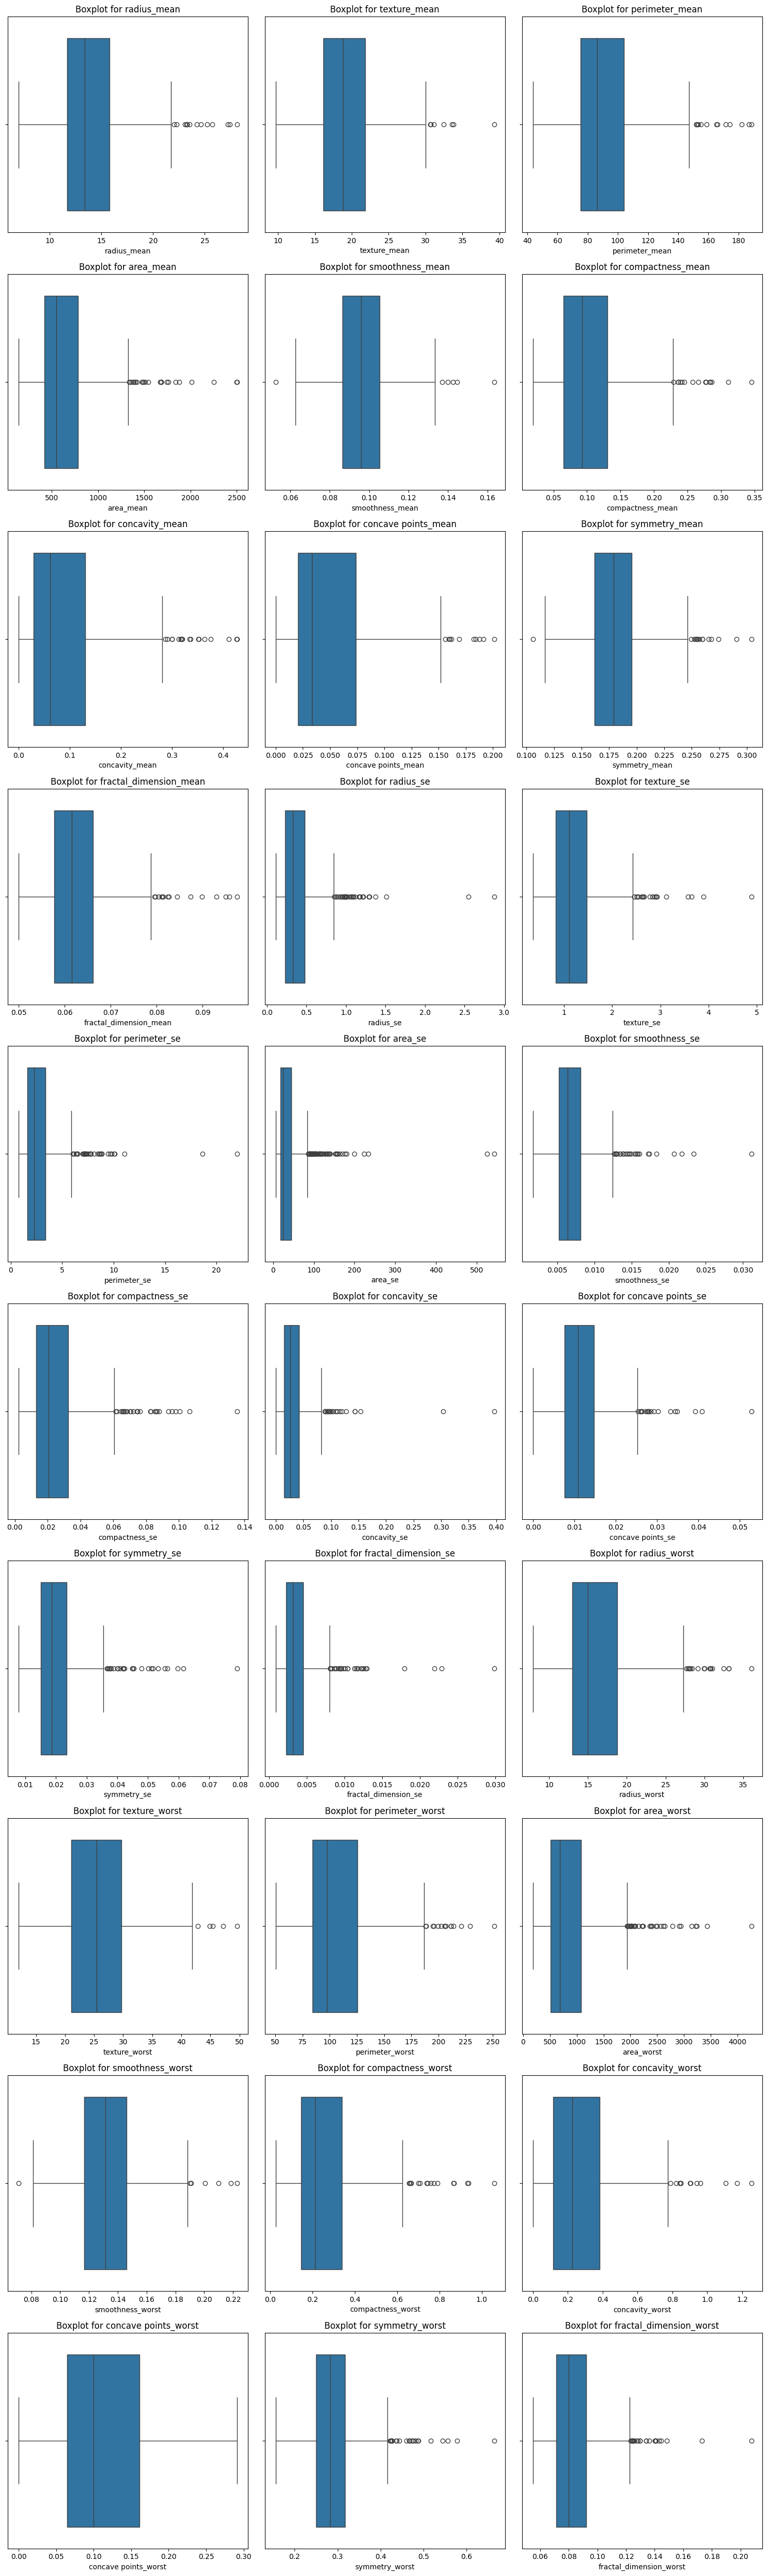

In [ ]:
# Checking for Outliers
# Exclude the diagnosis column from numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Determine grid size based on the number of features
num_features = len(numerical_features)
rows = (num_features // 3) + (num_features % 3 > 0)  # Calculate required rows

plt.figure(figsize=(15, 5 * rows))  # Adjust height dynamically
for i, col in enumerate(numerical_features, start=1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

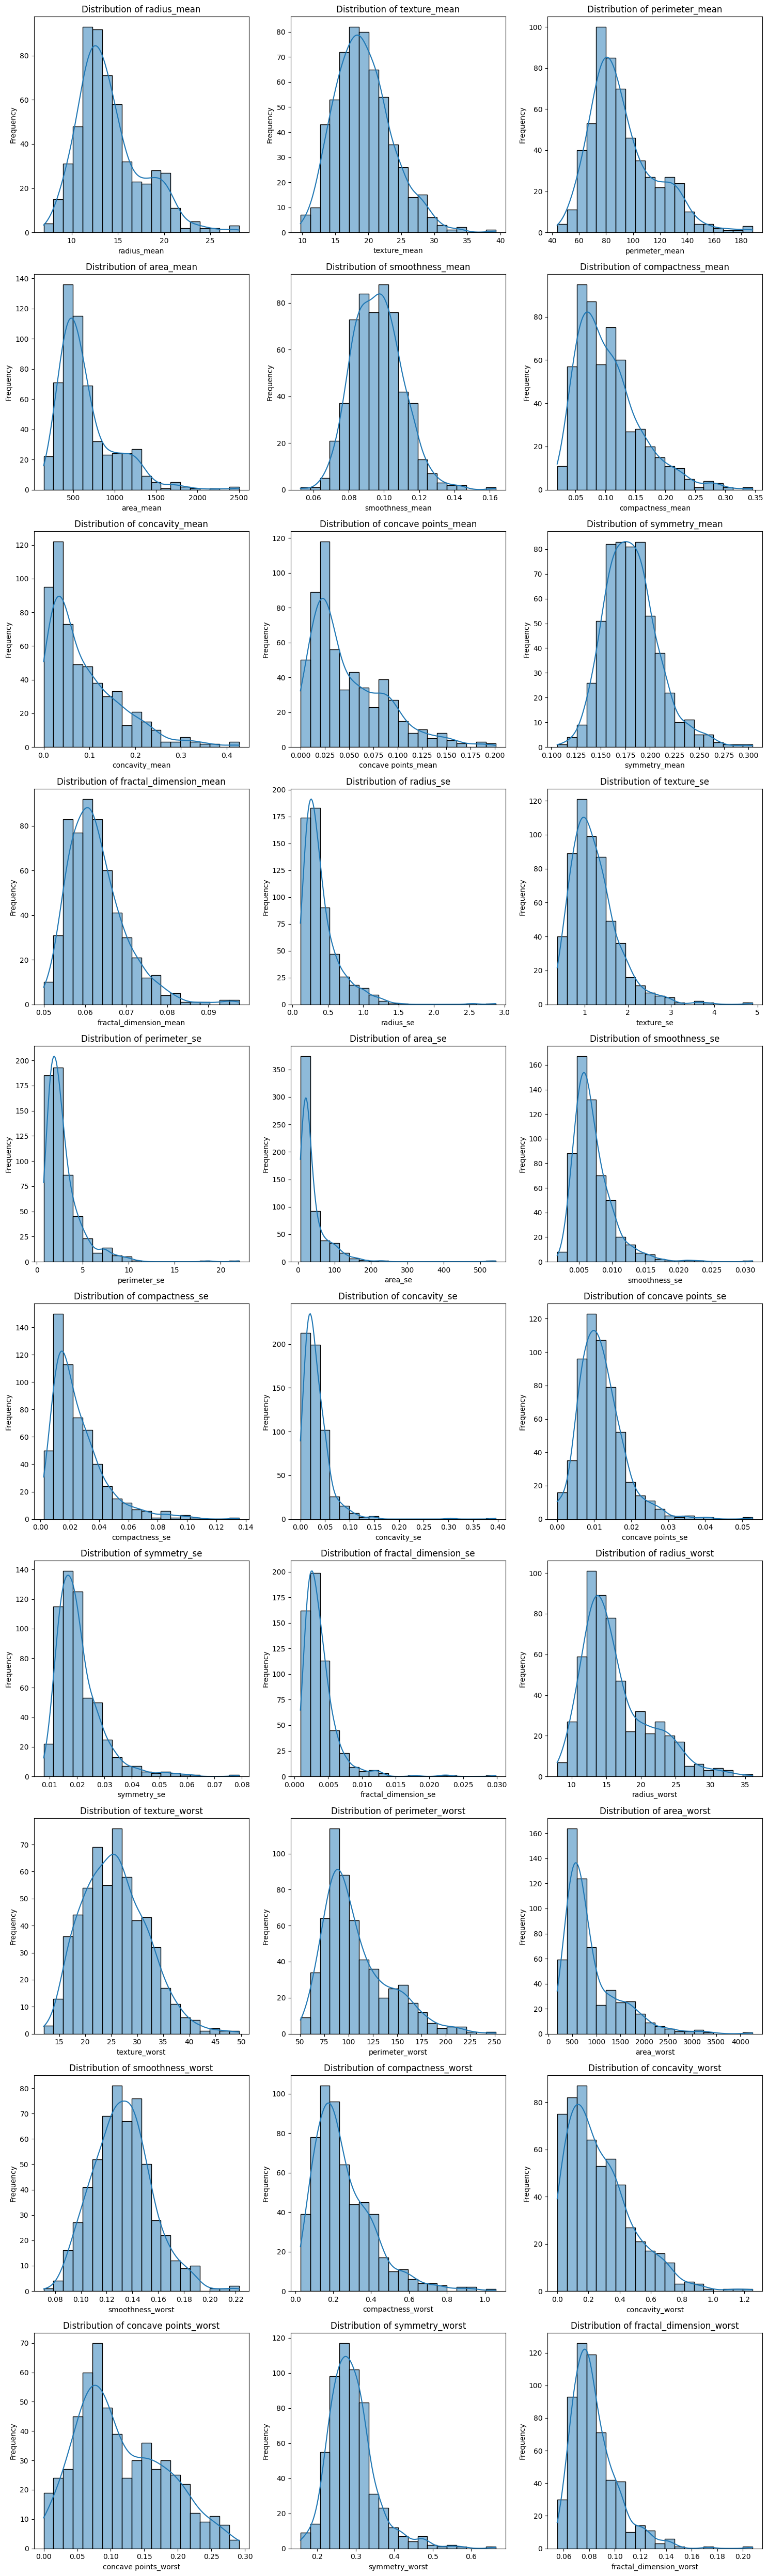

In [ ]:
# Distribution of Numerical Features
# Determine the number of rows and columns for subplots dynamically
num_features = len(numerical_features)

cols = 3  # Number of columns
rows = (num_features // cols) + (num_features % cols > 0)  # Calculate rows

# Create subplots
plt.figure(figsize=(15, 5 * rows))  # Adjust height dynamically
for i, col in enumerate(numerical_features, start=1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## 3. Data Preprocessing

### 3.1 Encoding Categorical Values

In [ ]:
# Encode the 'diagnosis' column into 1 (Malignant) and 0 (Benign)
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

# Display the first few rows of the dataset after encoding
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3.2 Handling Missing Values

In [ ]:
# Checking For Missing Values
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


There Is No Missing Value In The DataSet

### 3.4 Handling Outliers

In [ ]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply the outlier capping function to each numeric column
for column in df.columns:
  if column != 'diagnosis':
        cap_outliers(df, column)

### 3.5 Normalizing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Use StandardScaler to standardize the features
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X = scaler.fit_transform(X)

# Display the first few rows of the normalized dataset
print("Normalized Dataset:")
df.head()


Normalized Dataset:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


### 3.6 Split Dataset

In [ ]:
# Split features and target into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.15, shuffle=True, stratify=y)

# The shapes of the splits
train_shape = X_train.shape, y_train.shape
test_shape = X_test.shape, y_test.shape


### 3.7 Data Oversampling

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=104)
X_train, y_train = smote.fit_resample(X_train, y_train)

## 5. Model Training

### 5.1 Logistic Regression

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(random_state=104)

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Predict on the training set
train_predictions = logistic_regression.predict(X_train)

# Evaluate training metrics
train_accuracy = accuracy_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_balanced_accuracy = balanced_accuracy_score(y_train, train_predictions)

# Display training metrics
print("Logistic Regression Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"Balanced Accuracy: {train_balanced_accuracy:.4f}")


Logistic Regression Training Metrics:
Accuracy: 0.9917
F1 Score: 0.9917
Precision: 0.9967
Recall: 0.9868
Balanced Accuracy: 0.9917


### 5.2 KNN

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

# Range of k values to test
k_values = range(1, 21)  # Testing k from 1 to 20
accuracies = []

# Train KNN models with different k values and calculate accuracy for each
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Find the best k value
best_k = k_values[accuracies.index(max(accuracies))]
print(f'Best k value: {best_k} with accuracy {max(accuracies)}')

# Train final model with the best k value
KNNmodel = KNeighborsClassifier(n_neighbors=best_k)
KNNmodel.fit(X_train, y_train)

# Make predictions
# Train the model on the training data
KNNmodel.fit(X_train, y_train)

# Predict on the training set
train_predictions = KNNmodel.predict(X_train)

# Evaluate training metrics
train_accuracy = accuracy_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions, average='weighted')  # Adjust for multi-class
train_precision = precision_score(y_train, train_predictions, average='weighted')
train_recall = recall_score(y_train, train_predictions, average='weighted')
train_balanced_accuracy = balanced_accuracy_score(y_train, train_predictions)

# Display training metrics
print("\nKNN Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"Balanced Accuracy: {train_balanced_accuracy:.4f}")



Best k value: 3 with accuracy 0.9651162790697675

KNN Training Metrics:
Accuracy: 0.9868
F1 Score: 0.9868
Precision: 0.9868
Recall: 0.9868
Balanced Accuracy: 0.9868


In [ ]:

for k, accuracy in zip(range(1, 21), accuracies):
    print(f'Accuracy for k={k}: {accuracy:.4f}')


Accuracy for k=1: 0.9419
Accuracy for k=2: 0.9535
Accuracy for k=3: 0.9651
Accuracy for k=4: 0.9535
Accuracy for k=5: 0.9651
Accuracy for k=6: 0.9419
Accuracy for k=7: 0.9419
Accuracy for k=8: 0.9419
Accuracy for k=9: 0.9419
Accuracy for k=10: 0.9419
Accuracy for k=11: 0.9419
Accuracy for k=12: 0.9419
Accuracy for k=13: 0.9419
Accuracy for k=14: 0.9419
Accuracy for k=15: 0.9419
Accuracy for k=16: 0.9419
Accuracy for k=17: 0.9419
Accuracy for k=18: 0.9419
Accuracy for k=19: 0.9419
Accuracy for k=20: 0.9419


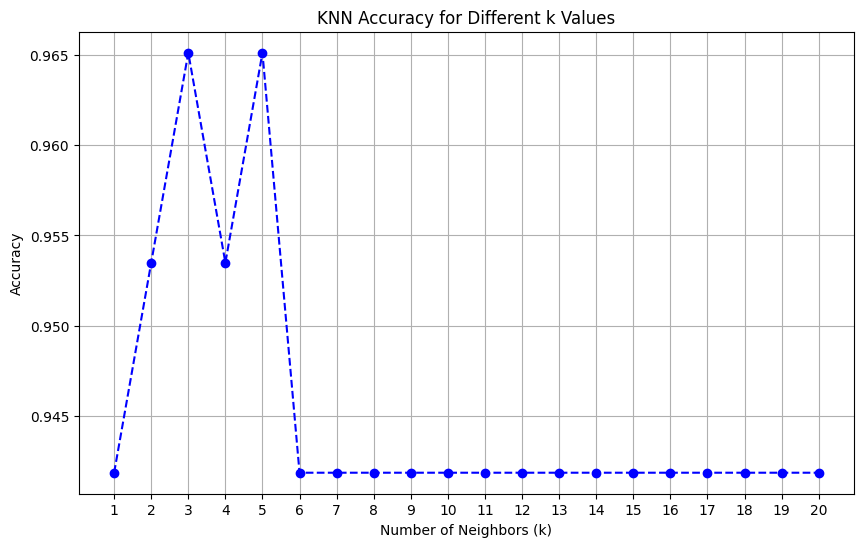

In [ ]:
import matplotlib.pyplot as plt

# Plotting the accuracies for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### 5.3 XGBoost

In [ ]:
from xgboost import XGBClassifier

# Train the model on the training data
xgb_model = XGBClassifier(use_label_encoder=False,
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    min_child_weight=5,
    reg_lambda=1,
    reg_alpha=0,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=104,
    eval_metric="logloss")

xgb_model.fit(X_train, y_train)

# Predict on the training set
train_predictions = xgb_model.predict(X_train)

# Evaluate training metrics
train_accuracy = accuracy_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_balanced_accuracy = balanced_accuracy_score(y_train, train_predictions)

# Display training metrics
print("XGBoost Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"Balanced Accuracy: {train_balanced_accuracy:.4f}")

XGBoost Training Metrics:
Accuracy: 0.9901
F1 Score: 0.9900
Precision: 0.9967
Recall: 0.9835
Balanced Accuracy: 0.9901


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[11:03:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




### 5.4 Naive Bayes

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
naive_bayes = GaussianNB()

# Train the model on the training data
naive_bayes.fit(X_train, y_train)

# Predict on the training set
train_predictions = naive_bayes.predict(X_train)

# Evaluate training metrics
train_accuracy = accuracy_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_balanced_accuracy = balanced_accuracy_score(y_train, train_predictions)

# Display training metrics
print("Naive Bayes Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"Balanced Accuracy: {train_balanced_accuracy:.4f}")

Naive Bayes Training Metrics:
Accuracy: 0.9373
F1 Score: 0.9362
Precision: 0.9522
Recall: 0.9208
Balanced Accuracy: 0.9373


## 6. Evaluation

### 6.1 Logistic Regression

In [ ]:
# Logistic Regression
# Predict on the test set
test_predictions = logistic_regression.predict(X_test)

# Evaluate test metrics
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Display test metrics
print("Logistic Regression Testing Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Balanced Accuracy: {test_balanced_accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.97      0.94      0.95        32

    accuracy                           0.97        86
   macro avg       0.97      0.96      0.96        86
weighted avg       0.97      0.97      0.96        86

Logistic Regression Testing Metrics:
Accuracy: 0.9651
F1 Score: 0.9524
Precision: 0.9677
Recall: 0.9375
Balanced Accuracy: 0.9595


In [ ]:
y_test.unique()


array([1, 0])

Confusion Matrix (Test):
[[53  1]
 [ 2 30]]


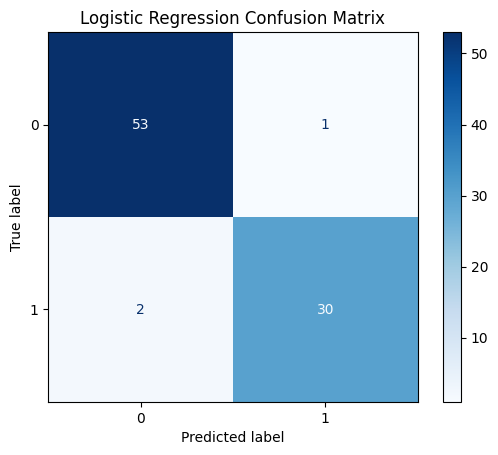

In [ ]:
# Compute and display confusion matrix for test set
test_conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix (Test):")
print(test_conf_matrix)
ConfusionMatrixDisplay(test_conf_matrix).plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


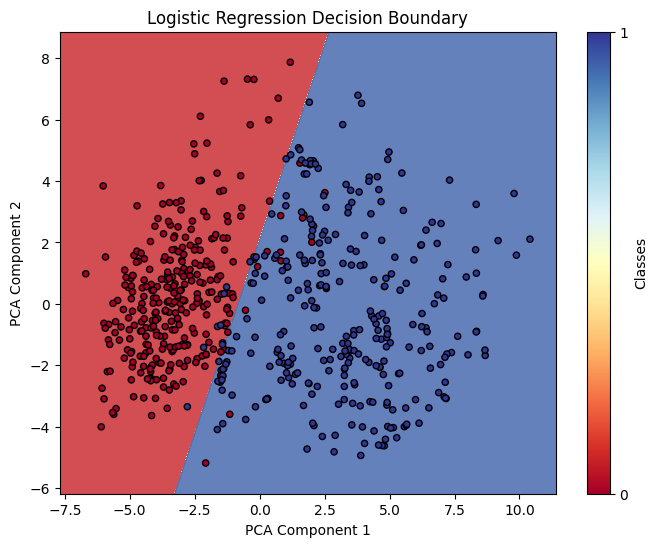

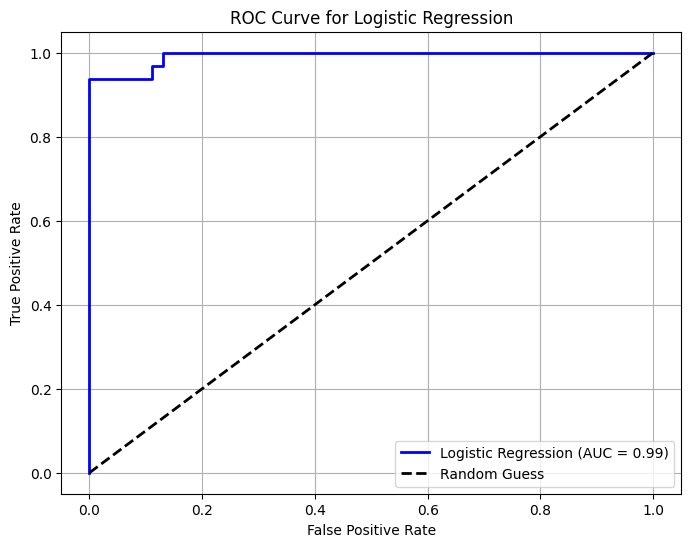

In [ ]:
# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train if isinstance(X_train, np.ndarray) else X_train.values)
X_test_pca = pca.transform(X_test if isinstance(X_test, np.ndarray) else X_test.values)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Ensure PCA.inverse_transform result is numpy array
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    if hasattr(X_train, 'columns'):  # If X_train is a DataFrame
        grid_points = pd.DataFrame(pca.inverse_transform(grid_points), columns=X_train.columns)
    else:
        grid_points = pca.inverse_transform(grid_points)

    Z = model.predict(grid_points)  # Predict on transformed grid
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)  # Use clear colormap
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu, s=20)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(ticks=[0, 1], label="Classes")
    plt.show()

# Call the function
plot_decision_boundary(logistic_regression, X_train_pca, y_train, "Logistic Regression Decision Boundary")

# Calculate probabilities for ROC curve
y_test_proba = logistic_regression.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guess')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 6.2 KNN

In [ ]:
# Predict on the test set KNNmodel best_knn_model
test_predictions = KNNmodel.predict(X_test)
# Evaluate test metrics
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions, average='weighted')  # Adjust for multi-class
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Print classification report for test set
print("Classification Report (Testing):")
print(classification_report(y_test, test_predictions))

# Display test metrics
print("KNN Testing Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Balanced Accuracy: {test_balanced_accuracy:.4f}")

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.97      0.94      0.95        32

    accuracy                           0.97        86
   macro avg       0.97      0.96      0.96        86
weighted avg       0.97      0.97      0.96        86

KNN Testing Metrics:
Accuracy: 0.9651
F1 Score: 0.9650
Precision: 0.9652
Recall: 0.9651
Balanced Accuracy: 0.9595


Confusion Matrix (Test):
[[53  1]
 [ 2 30]]


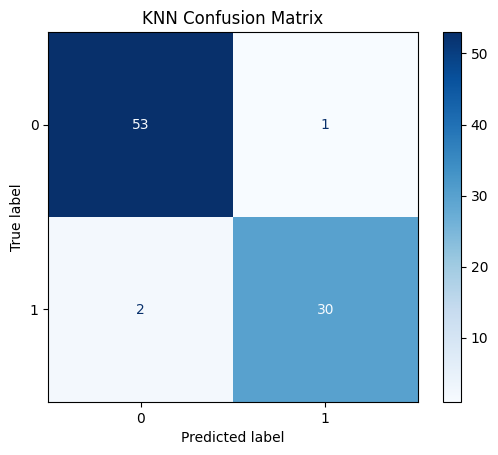

In [ ]:
# Compute and display confusion matrix for test set
test_conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix (Test):")
print(test_conf_matrix)
ConfusionMatrixDisplay(test_conf_matrix).plot(cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()


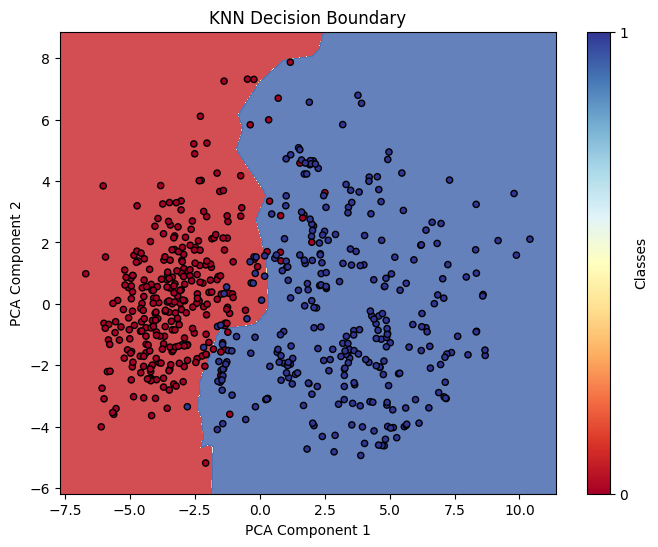

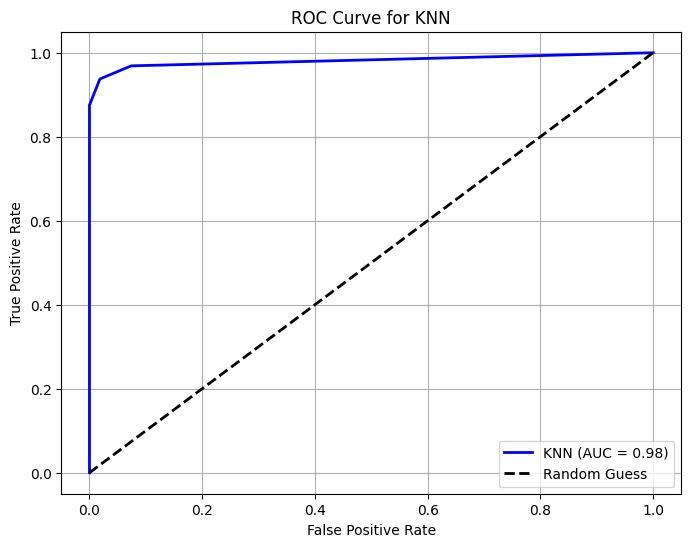

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train if isinstance(X_train, np.ndarray) else X_train.values)
X_test_pca = pca.transform(X_test if isinstance(X_test, np.ndarray) else X_test.values)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Ensure PCA.inverse_transform result is numpy array
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    if hasattr(X_train, 'columns'):  # If X_train is a DataFrame
        grid_points = pd.DataFrame(pca.inverse_transform(grid_points), columns=X_train.columns)
    else:
        grid_points = pca.inverse_transform(grid_points)

    Z = model.predict(grid_points)  # Predict on transformed grid
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)  # Use clear colormap
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu, s=20)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(ticks=range(len(np.unique(y))), label="Classes")
    plt.show()

# Call the function for KNN
plot_decision_boundary(KNNmodel, X_train_pca, y_train, "KNN Decision Boundary")

# Calculate probabilities for ROC curve (KNN does not provide direct probabilities for multiclass, use binary as example)
if len(np.unique(y_test)) == 2:  # Ensure binary classification
    y_test_proba = KNNmodel.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guess')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for KNN')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
else:
    print("ROC curve is not supported for multi-class classification with KNN.")

### 6.3 XGBoost

In [ ]:
# XGBoost
# Predict on the test set
test_predictions = xgb_model.predict(X_test)

# Evaluate test metrics
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# test metrics
print("XGBoost Testing Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Balanced Accuracy: {test_balanced_accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.91      0.91      0.91        32

    accuracy                           0.93        86
   macro avg       0.93      0.93      0.93        86
weighted avg       0.93      0.93      0.93        86

XGBoost Testing Metrics:
Accuracy: 0.9302
F1 Score: 0.9062
Precision: 0.9062
Recall: 0.9062
Balanced Accuracy: 0.9253


Confusion Matrix:
[[51  3]
 [ 3 29]]


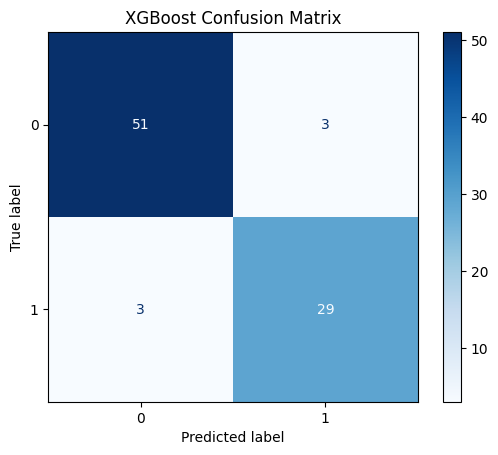

In [ ]:
# XGBoost
#  Compute confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()

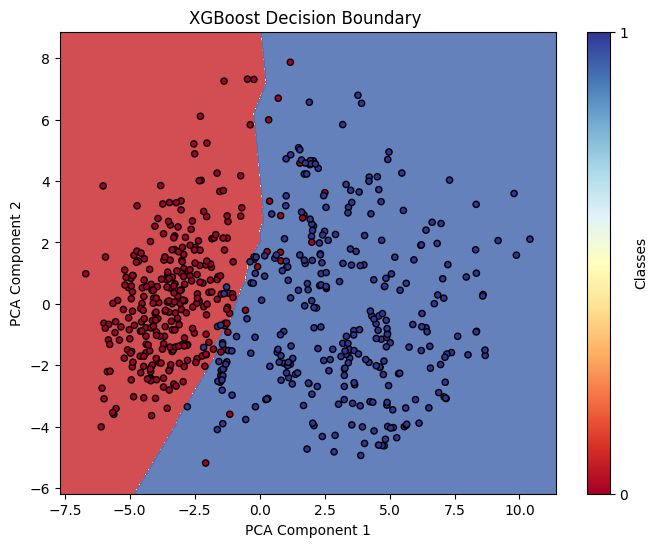

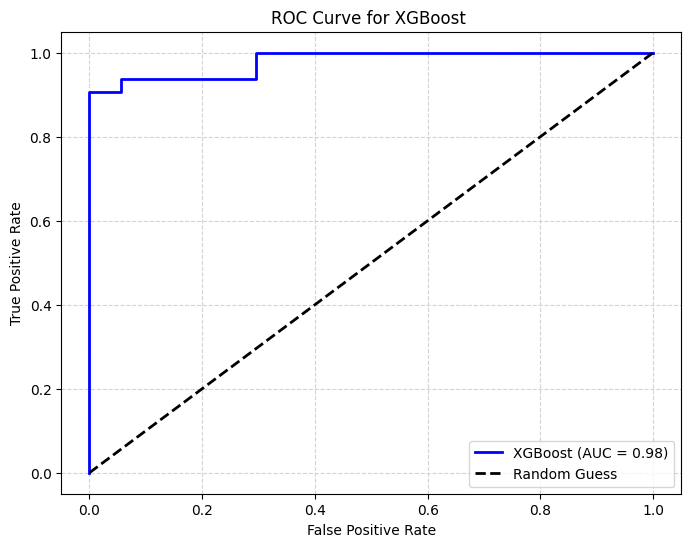

In [ ]:
# Perform PCA to reduce dimensions to 2 for decision boundary
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train if isinstance(X_train, np.ndarray) else X_train.values)
X_test_pca = pca.transform(X_test if isinstance(X_test, np.ndarray) else X_test.values)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    if hasattr(X_train, 'columns'):
        grid_points = pd.DataFrame(pca.inverse_transform(grid_points), columns=X_train.columns)
    else:
        grid_points = pca.inverse_transform(grid_points)

    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)  # Use clear colormap
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu, s=20)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(ticks=[0, 1], label="Classes")
    plt.show()

# Plot decision boundary
plot_decision_boundary(xgb_model, X_train_pca, y_train, "XGBoost Decision Boundary ")

# Calculate probabilities for ROC curve
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost ')
plt.legend(loc="lower right")
plt.grid(color="lightgray", linestyle="--")
plt.show()

### 6.4 Naive Bayes

In [ ]:
# Naive Bayes
# Predict on the test set
test_predictions = naive_bayes.predict(X_test)

# Evaluate test metrics
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Display test metrics
print("Naive Bayes Testing Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Balanced Accuracy: {test_balanced_accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.90      0.88      0.89        32

    accuracy                           0.92        86
   macro avg       0.92      0.91      0.91        86
weighted avg       0.92      0.92      0.92        86

Naive Bayes Testing Metrics:
Accuracy: 0.9186
F1 Score: 0.8889
Precision: 0.9032
Recall: 0.8750
Balanced Accuracy: 0.9097


Confusion Matrix:
[[51  3]
 [ 4 28]]


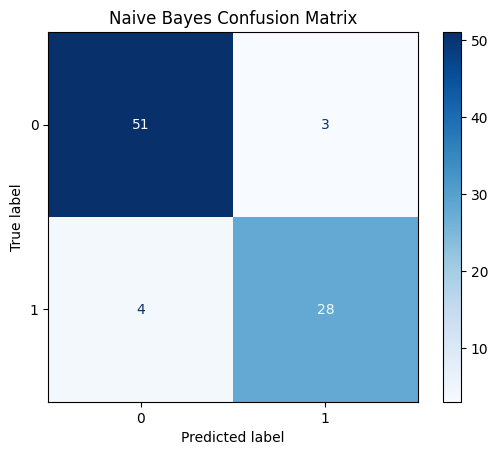

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

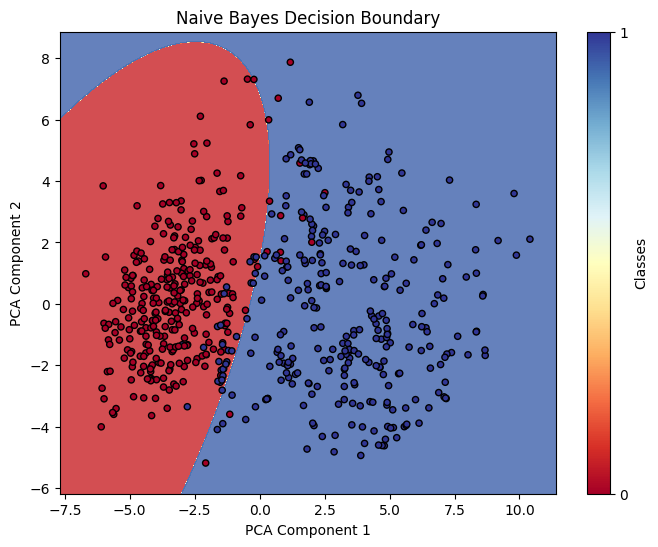

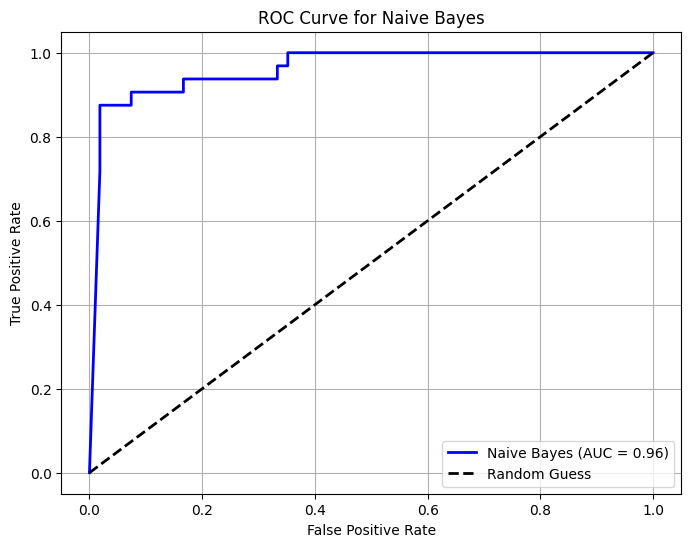

In [ ]:
# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train if isinstance(X_train, np.ndarray) else X_train.values)
X_test_pca = pca.transform(X_test if isinstance(X_test, np.ndarray) else X_test.values)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Ensure PCA.inverse_transform result is numpy array
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    if hasattr(X_train, 'columns'):  # If X_train is a DataFrame
        grid_points = pd.DataFrame(pca.inverse_transform(grid_points), columns=X_train.columns)
    else:
        grid_points = pca.inverse_transform(grid_points)

    Z = model.predict(grid_points)  # Predict on transformed grid
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)  # Use clear colormap
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu, s=20)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(ticks=[0, 1], label="Classes")
    plt.show()

# Call the function
plot_decision_boundary(naive_bayes, X_train_pca, y_train, "Naive Bayes Decision Boundary")

# Calculate probabilities for ROC curve
y_test_proba = naive_bayes.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guess')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.grid()
plt.show()